## Import Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt

## Define parameters

In [39]:
L = 2  # Length of the square domain
grid_sizes = [50, 100, 200]  # Different grid sizes for comparison

## Boundary conditions


In [40]:
def apply_boundary_conditions(V, grid_size):

    # Boundary 1: V = 0 along x = 0 for y = [0, 2]
    V[:, 0] = 0

    # Boundary 2: V = 0 along y = 0 for x = [0, 2]
    V[0, :] = 0

    # Boundary 3: V = 1 along x = [1, 2] and y = 1
    start_x = int(grid_size / 2)
    end_x = grid_size - 1
    y = int(grid_size / 2)
    V[y, start_x:end_x] = 1

    # Boundary 4: V = 1 along x = 1 and y = [1, 2]
    x = int(grid_size / 2)
    start_y = int(grid_size / 2)
    end_y = grid_size - 1
    V[start_y:end_y, x] = 1

    # Boundary 5: V varies linearly from 0 to 1 for x = [0, 1] at y = 2
    x_vals = np.linspace(0, 1, start_x + 1)
    y = grid_size - 1
    V[y, :start_x + 1] = x_vals

    # Boundary 6: V varies linearly from 0 to 1 for y = [0, 1] at x = 2
    y_vals = np.linspace(0, 1, start_y + 1)
    x = grid_size - 1
    V[:start_y + 1, x] = y_vals

    return V



## Laplace Equation Solver and diagram plotter

Grid Size: 50x50, Converged after 2021 iterations in 0.30 seconds.


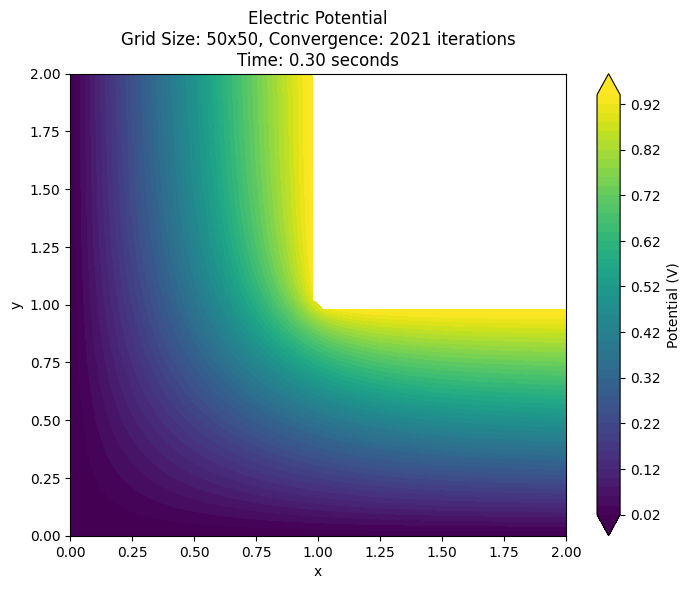

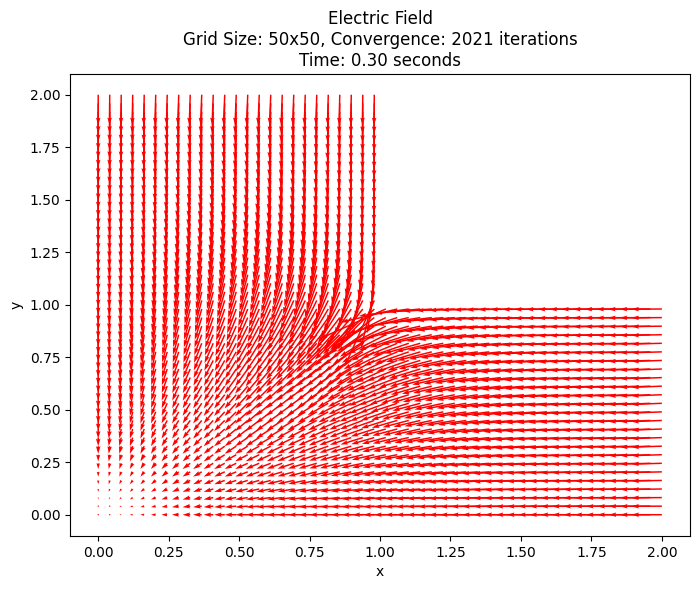

Grid Size: 100x100, Converged after 6670 iterations in 1.43 seconds.


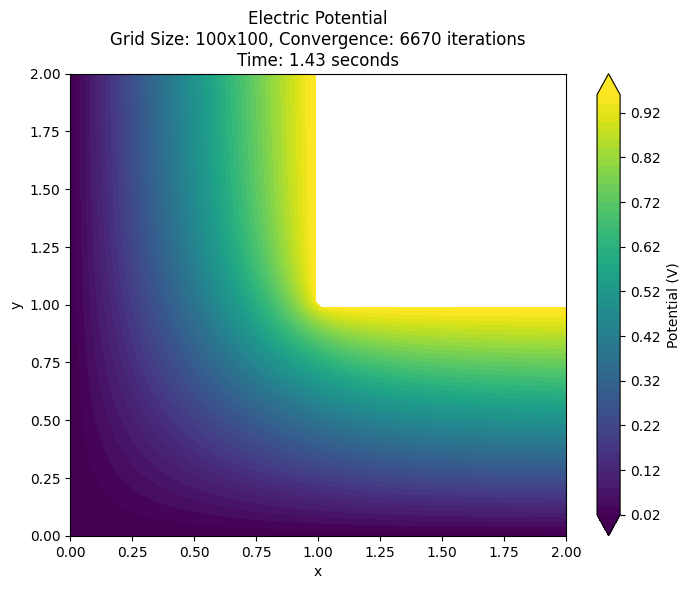

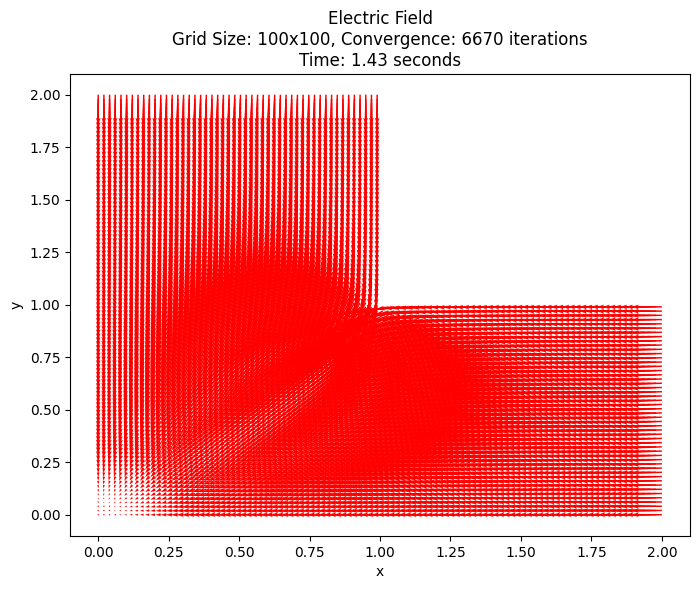

Grid Size: 200x200, Did not converge within the maximum number of iterations.


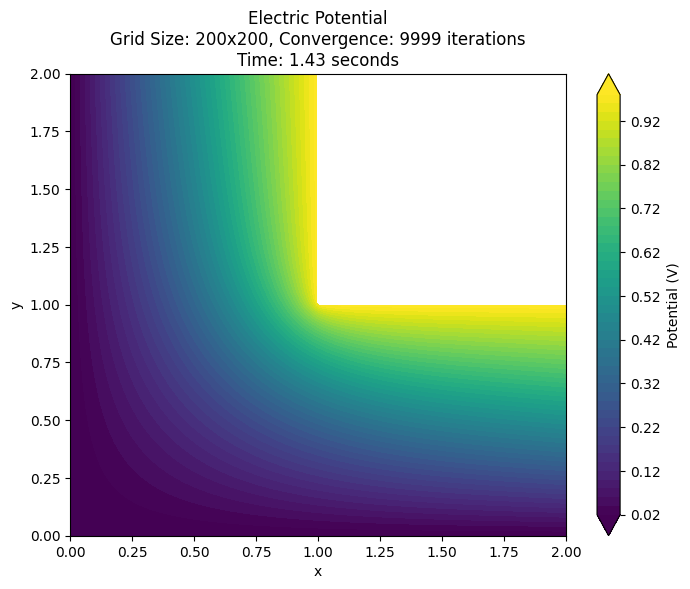

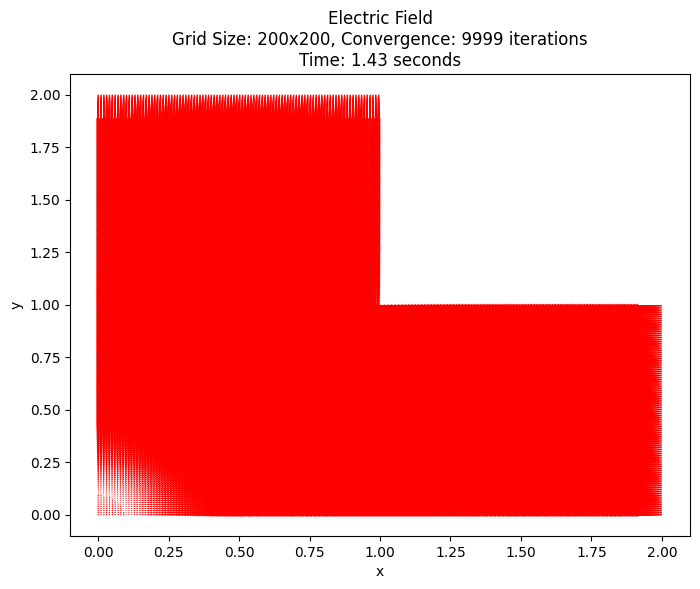

In [41]:
# Loop over different grid sizes
for grid_size in grid_sizes:
    dx = L / (grid_size - 1)  # Grid spacing

    # Initialize potential grid
    V = np.zeros((grid_size, grid_size))

    # Apply boundary conditions
    V = apply_boundary_conditions(V, grid_size)

    # Solve Laplace's equation iteratively
    max_iterations = 10000
    tolerance = 1e-6

    start_time = time.time()
    for iteration in range(max_iterations):
        V_old = V.copy()

        # Update the potential using the finite difference method
        V[1:-1, 1:-1] = 0.25 * (
            V_old[1:-1, :-2] + V_old[1:-1, 2:] + V_old[:-2, 1:-1] + V_old[2:, 1:-1]
        )

        # Reapply the boundary conditions to ensure they are maintained
        V = apply_boundary_conditions(V, grid_size)

        # Check for convergence
        if np.max(np.abs(V - V_old)) < tolerance:
            elapsed_time = time.time() - start_time
            print(f"Grid Size: {grid_size}x{grid_size}, Converged after {iteration} iterations in {elapsed_time:.2f} seconds.")
            break
    else:
        print(f"Grid Size: {grid_size}x{grid_size}, Did not converge within the maximum number of iterations.")

    # Mask the NAAN regions (x > 1 when y = [1:2] and y > 1 when x = [1:2])
    mask = np.zeros_like(V, dtype=bool)
    mask[int(grid_size / 2):, int(grid_size / 2):] = True
    V_masked = np.ma.masked_where(mask, V)

    # Compute the electric field
    Ex, Ey = np.gradient(-V, dx)
    Ex_masked = np.ma.masked_where(mask, Ex)
    Ey_masked = np.ma.masked_where(mask, Ey)

    # Plot the potential
    plt.figure(figsize=(8, 6))
    plt.contourf(
        np.linspace(0, L, grid_size),
        np.linspace(0, L, grid_size),
        V_masked, 50, cmap="viridis", extend="both"
    )
    plt.colorbar(label="Potential (V)")
    plt.title(f"Electric Potential\nGrid Size: {grid_size}x{grid_size}, Convergence: {iteration} iterations\nTime: {elapsed_time:.2f} seconds")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # Plot the electric field
    plt.figure(figsize=(8, 6))
    plt.quiver(
        np.linspace(0, L, grid_size),
        np.linspace(0, L, grid_size),
        Ex_masked, Ey_masked,
        scale=20,
        color="r",
    )
    plt.title(f"Electric Field\nGrid Size: {grid_size}x{grid_size}, Convergence: {iteration} iterations\nTime: {elapsed_time:.2f} seconds")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
